In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_reg = pd.read_csv('../data/Lab3_Mrdak_MO-221.csv')
df_reg

,Unnamed: 0,date,appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint,weekday
0,0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,...,48.900000,17.033333,45.530000,6.60,733.50,92.000000,7.000000,63.000000,5.3,Monday
1,1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,...,48.863333,17.066667,45.560000,6.48,733.60,92.000000,6.666667,59.166667,5.2,Monday
2,2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,...,48.730000,17.000000,45.500000,6.37,733.70,92.000000,6.333333,55.333333,5.1,Monday
3,3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,...,48.590000,17.000000,45.400000,6.25,733.80,92.000000,6.000000,51.500000,5.0,Monday
4,4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,...,48.590000,17.000000,45.400000,6.13,733.90,92.000000,5.666667,47.666667,4.9,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,19727,2016-05-27 16:50:00,120,0,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,...,51.500000,23.200000,46.718000,23.00,755.25,55.000000,2.833333,22.166667,13.4,Friday
17593,19728,2016-05-27 17:00:00,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,...,50.863333,23.200000,46.751429,23.00,755.20,55.000000,3.000000,22.000000,13.4,Friday
17594,19729,2016-05-27 17:10:00,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,...,50.445000,23.200000,46.745000,22.90,755.20,55.333333,3.166667,22.833333,13.4,Friday
17595,19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,...,50.074000,23.200000,46.790000,22.70,755.20,55.666667,3.333333,23.666667,13.3,Friday


In [4]:
df_class = pd.read_csv('../data/Lab4_Mrdak_MO-221.csv')
df_class

,Unnamed: 0,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,1,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,2,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,3,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,4,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...,...,...
81565,90830,(2019 GF1),0.008405,0.018795,8424.366481,3.821292e+06,27.50,0
81566,90831,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
81567,90832,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
81568,90834,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


## Удаление ненужных столбцов

In [5]:
df_reg = df_reg.drop(['Unnamed: 0', 'date', 'weekday'], axis=1)
df_reg

,appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.200000,48.900000,17.033333,45.530000,6.60,733.50,92.000000,7.000000,63.000000,5.3
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.200000,48.863333,17.066667,45.560000,6.48,733.60,92.000000,6.666667,59.166667,5.2
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.200000,48.730000,17.000000,45.500000,6.37,733.70,92.000000,6.333333,55.333333,5.1
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.100000,48.590000,17.000000,45.400000,6.25,733.80,92.000000,6.000000,51.500000,5.0
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.100000,48.590000,17.000000,45.400000,6.13,733.90,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,120,0,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,24.700000,45.560000,...,24.540000,51.500000,23.200000,46.718000,23.00,755.25,55.000000,2.833333,22.166667,13.4
17593,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,45.626667,...,24.600000,50.863333,23.200000,46.751429,23.00,755.20,55.000000,3.000000,22.000000,13.4
17594,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,45.626667,...,24.666667,50.445000,23.200000,46.745000,22.90,755.20,55.333333,3.166667,22.833333,13.4
17595,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.700000,50.074000,23.200000,46.790000,22.70,755.20,55.666667,3.333333,23.666667,13.3


In [6]:
df_class = df_class.drop(['Unnamed: 0', 'name'], axis=1)
df_class

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...
81565,0.008405,0.018795,8424.366481,3.821292e+06,27.50,0
81566,0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
81567,0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
81568,0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


## Выделение целевого признака для обоих датасетов

### Регрессия

In [7]:
y_reg = df_reg["appliances"]
X_reg = df_reg.drop(["appliances"], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, stratify = y_reg)

### Классификация

In [9]:
y_class = df_class["hazardous"]
X_class = df_class.drop(["hazardous"], axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, stratify = y_class)

## Балансировка для классификации

In [11]:
smote = SMOTE()
X_train_class, y_train_class = smote.fit_resample(X_train_class, y_train_class)

## Масштабирование

### Регрессия

In [12]:
from sklearn.preprocessing import StandardScaler
sc_reg = StandardScaler()
X_train_reg = sc_reg.fit_transform(X_train_reg)
X_test_reg = sc_reg.transform(X_test_reg)

### Классификация

In [13]:
sc_class = StandardScaler()
X_train_class = sc_class.fit_transform(X_train_class)
X_test_class = sc_class.transform(X_test_class)

## Создание вспомогательных функций

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
def metrics(name, y_test, y_pred):
    print(name)
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'R^2: {r2_score(y_test, y_pred)}')

In [15]:
from sklearn.metrics import roc_auc_score
def auc_roc(X_test, y_test, model):
    y_scores = model.predict_proba(X_test)   
    print(roc_auc_score(y_test, y_scores[:,1]))

# Деревья

## Поиск гиперпараметров

In [16]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

### Регрессия

In [17]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth": np.arange(1, 5, 1),
    "min_samples_split": np.arange(20, 30, 1),
    "min_samples_leaf": np.arange(10, 20, 1)
}

gridsearch = RandomizedSearchCV(DecisionTreeRegressor(), param_grid)
gridsearch.fit(X_train_reg, y_train_reg)

best_reg_criterion = gridsearch.best_params_["criterion"]
best_reg_max_depth = gridsearch.best_params_['max_depth']
best_reg_min_samples_split = gridsearch.best_params_['min_samples_split']
best_reg_min_samples_leaf = gridsearch.best_params_['min_samples_leaf']

gridsearch.best_params_

{'min_samples_split': 22,
 'min_samples_leaf': 16,
 'max_depth': 4,
 'criterion': 'squared_error'}

### Классификация

In [18]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(1, 5, 1),
    "min_samples_split": np.arange(20, 30, 1),
    "min_samples_leaf": np.arange(10, 20, 1)
}

gridsearch = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_grid)
gridsearch.fit(X_train_class, y_train_class)

best_class_criterion = gridsearch.best_params_["criterion"]
best_class_max_depth = gridsearch.best_params_['max_depth']
best_class_min_samples_split = gridsearch.best_params_['min_samples_split']
best_class_min_samples_leaf = gridsearch.best_params_['min_samples_leaf']

gridsearch.best_params_

{'min_samples_split': 21,
 'min_samples_leaf': 10,
 'max_depth': 4,
 'criterion': 'gini'}

## Построение моделей

### Регрессия

In [19]:
reg = DecisionTreeRegressor(criterion=best_reg_criterion, max_depth = best_reg_max_depth, min_samples_leaf = best_reg_min_samples_leaf , min_samples_split = best_reg_min_samples_split )
reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=16, min_samples_split=22)

In [20]:
y_pred_reg = reg.predict(X_test_reg)

In [21]:
metrics('Регрессия', y_test_reg, y_pred_reg)

Регрессия
MAE: 18.712168737409357
MSE: 630.4897402028439
RMSE: 25.109554759151823
MAPE: 0.31286284712712104
R^2: 0.22239314871104354


### Классификация

In [22]:
сlassification = DecisionTreeClassifier(criterion=best_class_criterion, max_depth = best_class_max_depth, min_samples_leaf = best_class_min_samples_leaf , min_samples_split = best_class_min_samples_split )
сlassification.fit(X_train_class, y_train_class)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=21)

In [23]:
y_pred_сlass = сlassification.predict(X_test_class)

In [24]:
cm = confusion_matrix(y_test_class, y_pred_сlass)

print(cm)

[[12636  2390]
 [   58  1230]]


In [25]:
print(classification_report(y_test_class, y_pred_сlass))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     15026
           1       0.34      0.95      0.50      1288

    accuracy                           0.85     16314
   macro avg       0.67      0.90      0.71     16314
weighted avg       0.94      0.85      0.88     16314



In [26]:
auc_roc(X_test_class, y_test_class, сlassification)

0.927448917735139


## Визуализация дерева решений

### Регрессия

[Text(0.5, 0.9, 'x[0] <= 0.198\nsquared_error = 811.164\nsamples = 14077\nvalue = 67.217'),
 Text(0.25, 0.7, 'x[12] <= -0.267\nsquared_error = 680.077\nsamples = 11132\nvalue = 62.909'),
 Text(0.125, 0.5, 'x[12] <= -1.625\nsquared_error = 766.024\nsamples = 4414\nvalue = 72.886'),
 Text(0.0625, 0.3, 'x[15] <= 0.708\nsquared_error = 795.226\nsamples = 1148\nvalue = 83.284'),
 Text(0.03125, 0.1, 'squared_error = 672.452\nsamples = 552\nvalue = 74.891'),
 Text(0.09375, 0.1, 'squared_error = 783.279\nsamples = 596\nvalue = 91.057'),
 Text(0.1875, 0.3, 'x[20] <= -0.556\nsquared_error = 704.4\nsamples = 3266\nvalue = 69.231'),
 Text(0.15625, 0.1, 'squared_error = 751.306\nsamples = 784\nvalue = 80.995'),
 Text(0.21875, 0.1, 'squared_error = 632.067\nsamples = 2482\nvalue = 65.516'),
 Text(0.375, 0.5, 'x[3] <= -0.575\nsquared_error = 515.22\nsamples = 6718\nvalue = 56.353'),
 Text(0.3125, 0.3, 'x[15] <= -1.599\nsquared_error = 357.484\nsamples = 3221\nvalue = 50.596'),
 Text(0.28125, 0.1, 'sq

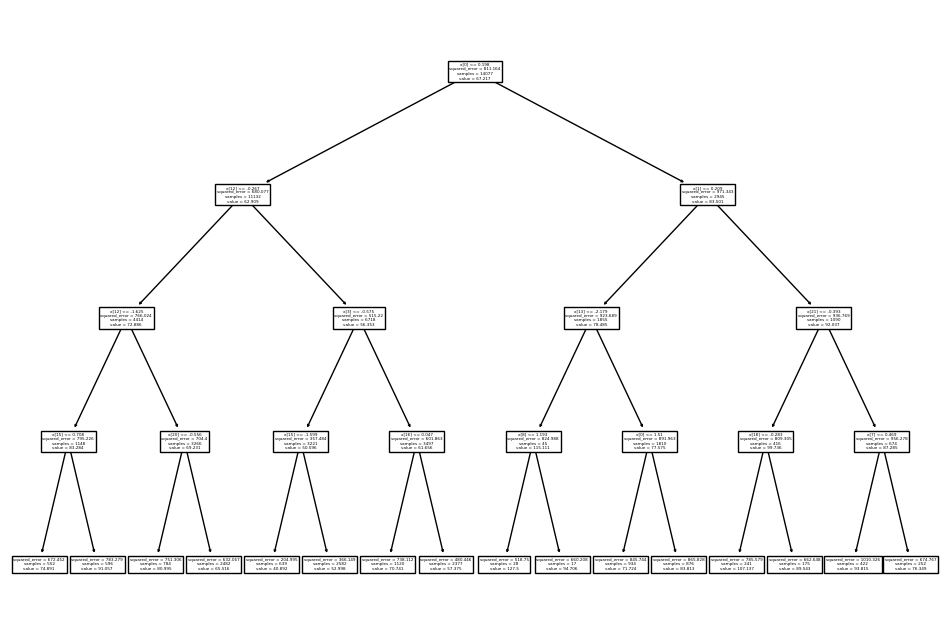

In [27]:
plt.figure(figsize=(12,8))

tree.plot_tree(reg.fit(X_train_reg, y_train_reg))

### Классификация

[Text(0.5, 0.9, 'x[0] <= -0.196\ngini = 0.5\nsamples = 120210\nvalue = [60105, 60105]'),
 Text(0.25, 0.7, 'x[1] <= -0.249\ngini = 0.015\nsamples = 49827\nvalue = [49442, 385]'),
 Text(0.125, 0.5, 'x[1] <= -0.303\ngini = 0.003\nsamples = 48980\nvalue = [48898, 82]'),
 Text(0.0625, 0.3, 'x[1] <= -0.337\ngini = 0.0\nsamples = 48192\nvalue = [48180, 12]'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 47501\nvalue = [47499, 2]'),
 Text(0.09375, 0.1, 'gini = 0.029\nsamples = 691\nvalue = [681, 10]'),
 Text(0.1875, 0.3, 'x[4] <= -0.208\ngini = 0.162\nsamples = 788\nvalue = [718, 70]'),
 Text(0.15625, 0.1, 'gini = 0.117\nsamples = 675\nvalue = [633, 42]'),
 Text(0.21875, 0.1, 'gini = 0.373\nsamples = 113\nvalue = [85, 28]'),
 Text(0.375, 0.5, 'x[3] <= -0.785\ngini = 0.46\nsamples = 847\nvalue = [544, 303]'),
 Text(0.3125, 0.3, 'x[3] <= -1.244\ngini = 0.442\nsamples = 224\nvalue = [74, 150]'),
 Text(0.28125, 0.1, 'gini = 0.358\nsamples = 120\nvalue = [28, 92]'),
 Text(0.34375, 0.1, 'gini = 0.493\

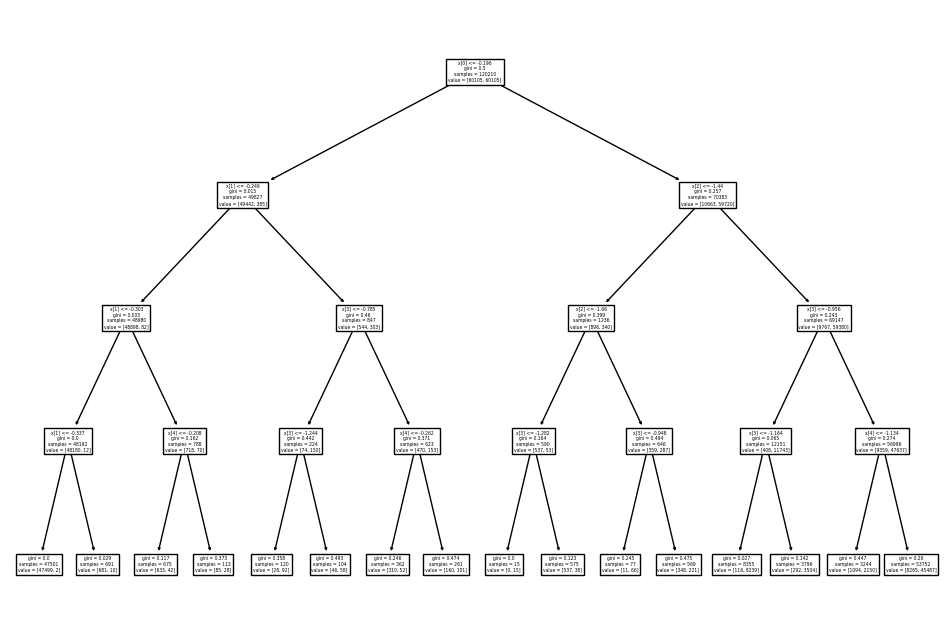

In [28]:
plt.figure(figsize=(12,8))

tree.plot_tree(сlassification.fit(X_train_class, y_train_class))

## Вывод решающих правил

### Регрессия

In [29]:
text_representation_reg = tree.export_text(reg)
print(text_representation_reg)

|--- feature_0 <= 0.20
|   |--- feature_12 <= -0.27
|   |   |--- feature_12 <= -1.62
|   |   |   |--- feature_15 <= 0.71
|   |   |   |   |--- value: [74.89]
|   |   |   |--- feature_15 >  0.71
|   |   |   |   |--- value: [91.06]
|   |   |--- feature_12 >  -1.62
|   |   |   |--- feature_20 <= -0.56
|   |   |   |   |--- value: [80.99]
|   |   |   |--- feature_20 >  -0.56
|   |   |   |   |--- value: [65.52]
|   |--- feature_12 >  -0.27
|   |   |--- feature_3 <= -0.57
|   |   |   |--- feature_15 <= -1.60
|   |   |   |   |--- value: [40.89]
|   |   |   |--- feature_15 >  -1.60
|   |   |   |   |--- value: [53.00]
|   |   |--- feature_3 >  -0.57
|   |   |   |--- feature_16 <= 0.05
|   |   |   |   |--- value: [70.74]
|   |   |   |--- feature_16 >  0.05
|   |   |   |   |--- value: [57.37]
|--- feature_0 >  0.20
|   |--- feature_1 <= 0.21
|   |   |--- feature_13 <= -2.18
|   |   |   |--- feature_8 <= 1.19
|   |   |   |   |--- value: [127.50]
|   |   |   |--- feature_8 >  1.19
|   |   |   |   |--

### Классификация

In [30]:
text_representation_class = tree.export_text(сlassification)
print(text_representation_class)

|--- feature_0 <= -0.20
|   |--- feature_1 <= -0.25
|   |   |--- feature_1 <= -0.30
|   |   |   |--- feature_1 <= -0.34
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.34
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.30
|   |   |   |--- feature_4 <= -0.21
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  -0.21
|   |   |   |   |--- class: 0
|   |--- feature_1 >  -0.25
|   |   |--- feature_3 <= -0.79
|   |   |   |--- feature_3 <= -1.24
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -1.24
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  -0.79
|   |   |   |--- feature_4 <= -0.26
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  -0.26
|   |   |   |   |--- class: 0
|--- feature_0 >  -0.20
|   |--- feature_2 <= -1.44
|   |   |--- feature_2 <= -1.66
|   |   |   |--- feature_3 <= -1.28
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -1.28
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  -1.66
|   |   |   |---

# Ансамбли

In [31]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import StackingClassifier, StackingRegressor

## Ансамбли для регресии

In [32]:
bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=30)
bag_reg.fit(X_train_reg, y_train_reg)
bag_reg_pred = bag_reg.predict(X_test_reg)

In [33]:
gb_reg = GradientBoostingRegressor(n_estimators=40)
gb_reg.fit(X_train_reg, y_train_reg)
gb_reg_pred = gb_reg.predict(X_test_reg)

In [34]:
stack_reg = StackingRegressor(estimators=[('bagging', bag_reg), ('gb', gb_reg)], final_estimator=LinearRegression())
stack_reg.fit(X_train_reg, y_train_reg)
stack_reg_pred = stack_reg.predict(X_test_reg)

In [35]:
metrics('Бэггинг',y_test_reg, bag_reg_pred)
metrics('Градиентный бустинг', y_test_reg, gb_reg_pred)
metrics('Стекинг',  y_test_reg, stack_reg_pred)

Бэггинг
MAE: 11.013446969696968
MSE: 263.46540404040405
RMSE: 16.231617419111505
MAPE: 0.1827851113834361
R^2: 0.6750581489343208
Градиентный бустинг
MAE: 16.745413374625546
MSE: 514.2606125852401
RMSE: 22.67731493332577
MAPE: 0.2826011680592307
R^2: 0.3657429293525327
Стекинг
MAE: 10.941554549619214
MSE: 259.56366034844007
RMSE: 16.110979496866108
MAPE: 0.18147638064612534
R^2: 0.6798703170528195


## Вывод

Лучше всего себя показал Стекинг, так как он имеет наибольший коэффициент R^2

### Ансамбли для классификации

In [36]:
bag_сlass = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=20)
bag_сlass.fit(X_train_class, y_train_class)
bag_сlass_pred = bag_сlass.predict(X_test_class)

In [37]:
gb_сlass = GradientBoostingClassifier(n_estimators=50)
gb_сlass.fit(X_train_class, y_train_class)
gb_сlass_pred = gb_сlass.predict(X_test_class)

In [38]:
stack_сlass = StackingClassifier(estimators=[('bagging', bag_сlass), ('gb', gb_сlass)], final_estimator=GaussianNB())
stack_сlass.fit(X_train_class, y_train_class)
stack_сlass_pred = stack_сlass.predict(X_test_class)

In [40]:
print('Бэггинг')
print(classification_report(y_test_class, bag_сlass_pred))
auc_roc(X_test_class, y_test_class, bag_сlass)
print('Градиентный бустинг')
print(classification_report(y_test_class, gb_сlass_pred))
auc_roc(X_test_class, y_test_class, gb_сlass)
print('Стекинг')
print(classification_report(y_test_class, stack_сlass_pred))
auc_roc(X_test_class, y_test_class, stack_сlass)

Бэггинг
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     15026
           1       0.56      0.51      0.53      1288

    accuracy                           0.93     16314
   macro avg       0.76      0.74      0.75     16314
weighted avg       0.93      0.93      0.93     16314

0.9229590552359348
Градиентный бустинг
              precision    recall  f1-score   support

           0       1.00      0.85      0.91     15026
           1       0.34      0.95      0.51      1288

    accuracy                           0.85     16314
   macro avg       0.67      0.90      0.71     16314
weighted avg       0.94      0.85      0.88     16314

0.9307984173188832
Стекинг
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     15026
           1       0.48      0.65      0.55      1288

    accuracy                           0.92     16314
   macro avg       0.72      0.79      0.75     16314


## Вывод

Лучше весго себя опять Стекинг, так как его метрика auc_roc_score наибольшая, а значит наилучшая

# Реализация библиотек

In [41]:
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

## Регрессия

In [42]:
catboost_reg = CatBoostRegressor()

xgboost_reg = XGBRegressor()

lightgbm_reg = LGBMRegressor()

In [43]:
catboost_reg.fit(X_train_reg, y_train_reg)


xgboost_reg.fit(X_train_reg, y_train_reg)


lightgbm_reg.fit(X_train_reg, y_train_reg)

Learning rate set to 0.062179
0:	learn: 28.0479334	total: 156ms	remaining: 2m 35s
1:	learn: 27.7156461	total: 168ms	remaining: 1m 23s
2:	learn: 27.3828464	total: 191ms	remaining: 1m 3s
3:	learn: 27.0549374	total: 200ms	remaining: 49.7s
4:	learn: 26.7724545	total: 214ms	remaining: 42.7s
5:	learn: 26.5174280	total: 226ms	remaining: 37.5s
6:	learn: 26.2529537	total: 235ms	remaining: 33.4s
7:	learn: 25.9949090	total: 249ms	remaining: 30.9s
8:	learn: 25.7840611	total: 261ms	remaining: 28.7s
9:	learn: 25.5747766	total: 271ms	remaining: 26.9s
10:	learn: 25.3673890	total: 294ms	remaining: 26.4s
11:	learn: 25.1880822	total: 309ms	remaining: 25.4s
12:	learn: 25.0218091	total: 318ms	remaining: 24.1s
13:	learn: 24.8748090	total: 334ms	remaining: 23.5s
14:	learn: 24.7387801	total: 347ms	remaining: 22.8s
15:	learn: 24.6139454	total: 356ms	remaining: 21.9s
16:	learn: 24.4828747	total: 378ms	remaining: 21.9s
17:	learn: 24.3771390	total: 405ms	remaining: 22.1s
18:	learn: 24.2765923	total: 423ms	remaini

LGBMRegressor()

In [44]:
catboost_reg_pred = catboost_reg.predict(X_test_reg)

xgboost_reg_pred = xgboost_reg.predict(X_test_reg)

lightgbm_reg_pred = lightgbm_reg.predict(X_test_reg)

In [45]:
metrics('СatBoost', catboost_reg_pred, y_pred_reg)
metrics('XGBoost', xgboost_reg_pred, y_pred_reg)
metrics('LightGBM', lightgbm_reg_pred, y_pred_reg)

СatBoost
MAE: 12.697814862541888
MSE: 278.47117341266124
RMSE: 16.68745557035767
MAPE: 0.188459299284297
R^2: 0.40357278639473326
XGBoost
MAE: 13.77869669645181
MSE: 328.40426796850153
RMSE: 18.121927821523336
MAPE: 0.20685914833716137
R^2: 0.3681426494561941
LightGBM
MAE: 11.303145433628002
MSE: 223.7372282485604
RMSE: 14.957848382991466
MAPE: 0.16517611633514243
R^2: 0.45555136845804034


## Вывод

Лучше всего себя показала библиотека LightGBM, так как модель, построеннная с её помощью имеет наилучшие показатели

## Классификация

In [46]:
catboost_class = CatBoostClassifier()

xgboost_class = XGBClassifier()

lightgbm_class = LGBMClassifier()

In [47]:
catboost_class.fit(X_train_class, y_train_class)


xgboost_class.fit(X_train_class, y_train_class)


lightgbm_class.fit(X_train_class, y_train_class)

Learning rate set to 0.079629
0:	learn: 0.5542524	total: 25.6ms	remaining: 25.6s
1:	learn: 0.4613522	total: 53.2ms	remaining: 26.5s
2:	learn: 0.4038490	total: 84ms	remaining: 27.9s
3:	learn: 0.3653026	total: 107ms	remaining: 26.7s
4:	learn: 0.3323467	total: 125ms	remaining: 24.9s
5:	learn: 0.3134552	total: 142ms	remaining: 23.6s
6:	learn: 0.2973847	total: 160ms	remaining: 22.7s
7:	learn: 0.2860710	total: 175ms	remaining: 21.8s
8:	learn: 0.2777731	total: 203ms	remaining: 22.4s
9:	learn: 0.2705661	total: 219ms	remaining: 21.7s
10:	learn: 0.2633088	total: 239ms	remaining: 21.5s
11:	learn: 0.2569986	total: 255ms	remaining: 21s
12:	learn: 0.2532225	total: 272ms	remaining: 20.7s
13:	learn: 0.2491417	total: 290ms	remaining: 20.4s
14:	learn: 0.2465987	total: 317ms	remaining: 20.8s
15:	learn: 0.2436730	total: 335ms	remaining: 20.6s
16:	learn: 0.2407639	total: 354ms	remaining: 20.5s
17:	learn: 0.2390617	total: 374ms	remaining: 20.4s
18:	learn: 0.2362398	total: 391ms	remaining: 20.2s
19:	learn: 0

LGBMClassifier()

In [48]:
catboost_class_pred = catboost_class.predict(X_test_class)

xgboost_class_pred = xgboost_class.predict(X_test_class)

lightgbm_class_pred = lightgbm_class.predict(X_test_class)

In [49]:
print('CatBoost')
print(classification_report(y_test_class, catboost_class_pred))
auc_roc(X_test_class, y_test_class, catboost_class)
print('XGBoost')
print(classification_report(y_test_class, xgboost_class_pred))
auc_roc(X_test_class, y_test_class, xgboost_class)
print('LightGBM')
print(classification_report(y_test_class, lightgbm_class_pred))
auc_roc(X_test_class, y_test_class, lightgbm_class)

CatBoost
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15026
           1       0.46      0.57      0.51      1288

    accuracy                           0.91     16314
   macro avg       0.71      0.75      0.73     16314
weighted avg       0.92      0.91      0.92     16314

0.9426737185565723
XGBoost
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     15026
           1       0.42      0.62      0.50      1288

    accuracy                           0.90     16314
   macro avg       0.69      0.77      0.72     16314
weighted avg       0.92      0.90      0.91     16314

0.9397345326072488
LightGBM
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     15026
           1       0.43      0.59      0.50      1288

    accuracy                           0.91     16314
   macro avg       0.70      0.76      0.72     16314
weighted a

## Вывод

Лучше всего себя показала библиотека CatBoost, так как модель, построенная с её помощью имеет наибольший AUC_ROC_score.

# Реализация CART

In [50]:
import sys
sys.path.append("..")
from models.CART import CART

In [51]:
myRegCart = CART('mse', best_reg_max_depth, best_reg_min_samples_split)

In [52]:
myRegCart.fit(X_train_reg, y_train_reg)

In [53]:
y_pred_cart_reg = myRegCart.predict(X_test_reg)

In [54]:
metrics("Мой CART для регресии",y_test_reg, y_pred_cart_reg)

Мой CART для регресии
MAE: 18.739403760026008
MSE: 632.3593651152954
RMSE: 25.146756552591338
MAPE: 0.3130730241620967
R^2: 0.22008726956891023


In [55]:
myClassCart = CART('gini', best_class_max_depth, best_class_min_samples_split)

In [56]:
myClassCart.fit(X_train_class[:10000], y_train_class[:10000])

In [57]:
y_pred_cart_class = myClassCart.predict(X_test_class[:2500])

In [58]:
print('Мой CART для классификации')
print(classification_report(y_test_class[:2500], y_pred_cart_class))

Мой CART для классификации
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2297
           1       0.87      0.13      0.22       203

    accuracy                           0.93      2500
   macro avg       0.90      0.56      0.59      2500
weighted avg       0.92      0.93      0.90      2500

